In [1]:
%pip install requests pandas scipy matplotlib seaborn
#!pip install requests pandas scipy matplotlib seaborn

  Using cached requests-2.32.3-py3-none-any.whl (64 kB)
  Using cached certifi-2025.1.31-py3-none-any.whl (166 kB)
  Using cached idna-3.10-py3-none-any.whl (70 kB)
  Using cached urllib3-2.3.0-py3-none-any.whl (128 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\robot\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


                             time                    
                            count      mean       std
backend                                              
http://new_movie_model:8082   296  0.089061  0.314631
http://user_model:8082        702  0.038040  0.009549
Chi-Square Test: χ²=0.00, p-value=1.0000
T-Test: t=-4.29, p-value=0.0000


C:\Users\robot\AppData\Local\Temp\ipykernel_7072\3619788648.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='backend', y='time', palette='Set2')
c:\Users\robot\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 81.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\robot\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 92.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\robot\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 77.4% of the points cannot be placed; you may want to decrease th

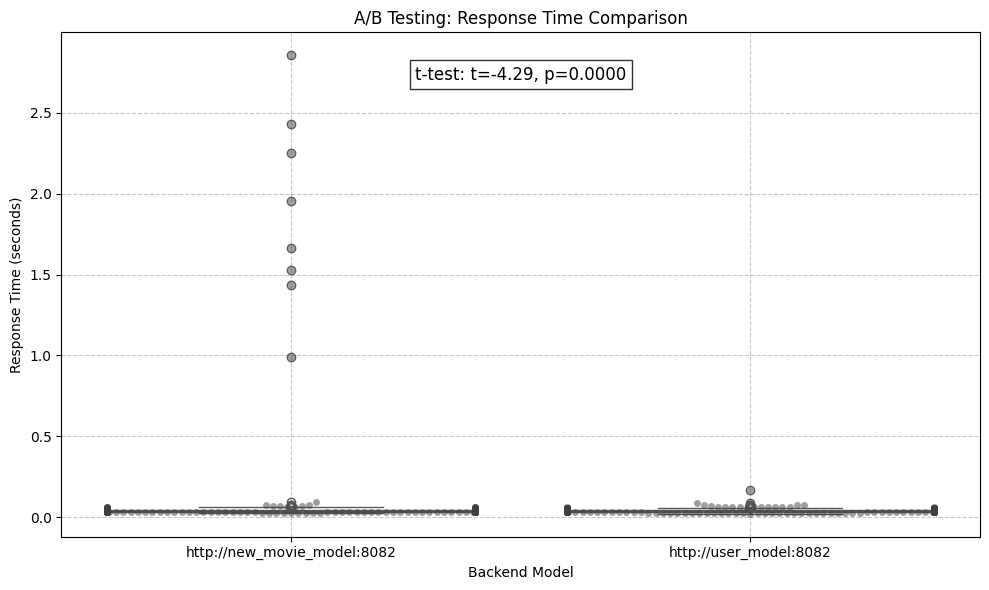

In [2]:
import requests
import pandas as pd
import time
from scipy.stats import chi2_contingency, ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Run experiment
results = []
for i in range(1000):
    start = time.time()
    r = requests.get(f'http://localhost:8081/recommend/{i}')
    duration = time.time() - start
    backend = r.headers.get('X-Backend')
    results.append({'backend': backend, 'time': duration})

# 2. Load data
df = pd.DataFrame(results)

# 3. Quick summary
print(df.groupby('backend').agg(['count', 'mean', 'std']))

# 4. Statistical tests

# Chi-Square test for request count distribution
counts = df['backend'].value_counts().values
chi2, p, _, _ = chi2_contingency([counts])
print(f"Chi-Square Test: χ²={chi2:.2f}, p-value={p:.4f}")

# T-Test for response times
back1 = df[df['backend'] == 'http://user_model:8082']['time']
back2 = df[df['backend'] == 'http://new_movie_model:8082']['time']
t_stat, p_val = ttest_ind(back1, back2)
print(f"T-Test: t={t_stat:.2f}, p-value={p_val:.4f}")

# 5. Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='backend', y='time', palette='Set2')
sns.swarmplot(data=df, x='backend', y='time', color=".25", alpha=0.5)

plt.title('A/B Testing: Response Time Comparison')
plt.xlabel('Backend Model')
plt.ylabel('Response Time (seconds)')
plt.grid(True, linestyle='--', alpha=0.7)

# Optional: Add statistical result
plt.text(0.5, max(df['time']) * 0.9, f't-test: t={t_stat:.2f}, p={p_val:.4f}',
         ha='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()
